## Comparative Study Between Ensemble Learning and Evolutionary Learning to solve the Higgs Bozon Detection

_Authors: Alessia SARRITZU, Alberto MARTINELLI_
<br>

The purpose of this homework is to:
1. Implement and compare **Ensemble Learning** techniques (Bagging and Boosting) with **Evolutionary Learning** using DEAP.
2. Evaluate and analyze the performance of these approaches on the **Higgs Boson Detection** dataset.
3. Understand the strengths, weaknesses, and trade-offs between these methods.

### Dataset
The dataset contains features derived from particle collision events to classify whether an event is a signal (Higgs boson) or background noise.

**SOURCE:** https://opendata.cern.ch/record/328

In [2]:
import pandas as pd
import gzip

with gzip.open("atlas-higgs-challenge-2014-v2.csv.gz", 'rt') as f:
    data = pd.read_csv(f)

# Explore the data
print(data.shape)
print(data.dtypes)
data.head()

(818238, 35)
EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_lead

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


### 1. Dataset Preprocessing
In this step we will:
- Handle missing values (if any).
- Standardize the features.
- Split the data into training and testing sets.
- Use feature selection to reduce dimensionality.

In [3]:
from sklearn import preprocessing

# Transform the text data using Label Encoder
encoder =preprocessing.LabelEncoder()
data['Label'] = encoder.fit_transform(data['Label'])

# Drop superflous columns
data = data.drop(columns=['EventId', 'Weight', 'KaggleSet', 'KaggleWeight'])

data.head(10)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,1
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,0
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,1
7,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,...,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,1
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
9,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,...,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,1


In [4]:
from sklearn.impute import SimpleImputer

# Instantiate the SimpleImputer and set the missing value marker to -999
imputer = SimpleImputer(missing_values=-999.0, strategy='mean')

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply imputer to numeric columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Check for missing values after imputation
print("Missing values after imputation:")
print((data == -999).sum())  # This should print 0 for all columns


Missing values after imputation:
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [5]:
from sklearn.model_selection import train_test_split

# Standardize the features
features = data.drop(columns=['Label'])
scaler = preprocessing.MinMaxScaler()
std_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(std_features, data['Label'], test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (572766, 30), Testing set shape: (245472, 30)


In [7]:
from sklearn.feature_selection import f_classif

# Calculate feature importance scores using f_classif
f_scores, p_values = f_classif(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'F-Score': f_scores
}).sort_values(by='F-Score', ascending=False)

print("Feature importance scores:")
print(feature_importance)

# Feature selection: features with F-Score > 10k were selected
selected_features = feature_importance[feature_importance['F-Score'] > 10000]['Feature']
X_train_selected = X_train[:, feature_importance['F-Score'] > 10000]
X_test_selected = X_test[:, feature_importance['F-Score'] > 10000]

print(f"\n\nSelected features based on F-Score > 10k: {selected_features.tolist()}")
print(f"Shape after selecting features: {X_train_selected.shape}, {X_test_selected.shape}")

Feature importance scores:
                        Feature       F-Score
1   DER_mass_transverse_met_lep  80539.077697
11       DER_met_phi_centrality  45649.209306
13                   PRI_tau_pt  33663.655888
10         DER_pt_ratio_lep_tau  22382.676088
3                      DER_pt_h  22375.432244
4          DER_deltaeta_jet_jet  20280.656603
5              DER_mass_jet_jet  18777.571962
12       DER_lep_eta_centrality  17543.634726
6           DER_prodeta_jet_jet  16145.541919
9                    DER_sum_pt  13727.518019
21                PRI_met_sumet  10853.406062
22                  PRI_jet_num  10511.576534
29               PRI_jet_all_pt  10397.258713
23           PRI_jet_leading_pt   4343.334520
16                   PRI_lep_pt    521.153673
19                      PRI_met    226.185909
26        PRI_jet_subleading_pt    142.068829
8                    DER_pt_tot    136.843799
0                  DER_mass_MMC     98.262435
7            DER_deltar_tau_lep     91.149001
2      

### 2. Ensemble Learning Implementation
In this step we will implement bagging and boosting ensemble learning techniques:
1. **Bagging**: _Random Forest_ and _Bagging Classifier_ with _Logistic Regressor_ as base estimator.
2. **Boosting**: _XGBoost_ and _AdaBoost_.

#### 2.1.1 BAGGING - Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# Random Forest
random_forest_clf = RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

start_time_rf = time.time()
random_forest_clf.fit(X_train, y_train)
training_time_rf = time.time() - start_time_rf

In [9]:
# Predictions and Metrics
start_time_rf = time.time()
y_pred_rf = random_forest_clf.predict(X_test)
test_time_rf = time.time() - start_time_rf

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf['accuracy'] = accuracy_score(y_test, y_pred_rf)
report_rf['training_time'] = training_time_rf
report_rf['test_time'] = test_time_rf
report_rf_df = pd.DataFrame(report_rf).transpose()
print("Detailed Classification Report for Random Forest:")
print(report_rf_df)

Detailed Classification Report for Random Forest:
               precision     recall   f1-score        support
0.0             0.857769   0.906405   0.881417  161515.000000
1.0             0.797898   0.710864   0.751871   83957.000000
accuracy        0.839525   0.839525   0.839525       0.839525
macro avg       0.827834   0.808634   0.816644  245472.000000
weighted avg    0.837292   0.839525   0.837109  245472.000000
training_time  42.295846  42.295846  42.295846      42.295846
test_time       1.197446   1.197446   1.197446       1.197446


#### 2.1.2 BAGGING - BaggingClassifier with Logistic Regression

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Bagging with Logistic Regression
bagging_clf = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

start_time_bg = time.time()
bagging_clf.fit(X_train, y_train)
training_time_bg = time.time() - start_time_bg

In [11]:
# Predictions and Metrics
start_time_bg = time.time()
y_pred_bagging = bagging_clf.predict(X_test)
test_time_bg = time.time() - start_time_bg

report = classification_report(y_test, y_pred_bagging, output_dict=True)
report['accuracy'] = accuracy_score(y_test, y_pred_bagging)
report['training_time'] = training_time_bg
report['test_time'] = test_time_bg
report_df_bg = pd.DataFrame(report).transpose()
print("Detailed Classification Report for Bagging with Logistic Regression:")
print(report_df_bg)

Detailed Classification Report for Bagging with Logistic Regression:
                precision      recall    f1-score        support
0.0              0.778655    0.866285    0.820136  161515.000000
1.0              0.671678    0.526257    0.590141   83957.000000
accuracy         0.749988    0.749988    0.749988       0.749988
macro avg        0.725166    0.696271    0.705138  245472.000000
weighted avg     0.742066    0.749988    0.741472  245472.000000
training_time  331.278679  331.278679  331.278679     331.278679
test_time        2.439369    2.439369    2.439369       2.439369


#### 2.2.1 BOOSTING: XGBoost

In [12]:
import xgboost as xgb

# XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

start_time_xgb = time.time()
xgb_clf.fit(X_train, y_train)
training_time_xgb = time.time() - start_time_xgb

In [13]:
# Predictions and Metrics
start_time_xgb = time.time()
y_pred_xgb = xgb_clf.predict(X_test)
test_time_xgb = time.time() - start_time_xgb

report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_xgb['accuracy'] = accuracy_score(y_test, y_pred_xgb)
report_xgb['training_time'] = training_time_xgb
report_xgb['test_time'] = test_time_xgb
report_xgb_df = pd.DataFrame(report_xgb).transpose()
print("Detailed Classification Report for XGBoost:")
print(report_xgb_df)

Detailed Classification Report for XGBoost:
               precision    recall  f1-score        support
0.0             0.861683  0.901631  0.881205  161515.000000
1.0             0.792230  0.721572  0.755252   83957.000000
accuracy        0.840047  0.840047  0.840047       0.840047
macro avg       0.826956  0.811602  0.818228  245472.000000
weighted avg    0.837928  0.840047  0.838126  245472.000000
training_time   1.459391  1.459391  1.459391       1.459391
test_time       0.067921  0.067921  0.067921       0.067921


#### 2.2.2 BOOSTING: AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
ada_clf = AdaBoostClassifier(
    n_estimators=100,      # Number of weak learners
    learning_rate=1.0,     # Weight applied to each learner
    random_state=42
)

start_time_ada = time.time()
ada_clf.fit(X_train, y_train)
training_time_ada = time.time() - start_time_ada

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [15]:
# Predictions and Metrics for AdaBoost
start_time_ada = time.time()
y_pred_ada = ada_clf.predict(X_test)
test_time_ada = time.time() - start_time_ada

report_ada = classification_report(y_test, y_pred_ada, output_dict=True)
report_ada['accuracy'] = accuracy_score(y_test, y_pred_ada)
report_ada['training_time'] = training_time_ada
report_ada['test_time'] = test_time_ada
report_ada_df = pd.DataFrame(report_ada).transpose()
print("Detailed Classification Report for AdaBoost:")
print(report_ada_df)

Detailed Classification Report for AdaBoost:
                precision      recall    f1-score        support
0.0              0.845347    0.882952    0.863740  161515.000000
1.0              0.753751    0.689246    0.720057   83957.000000
accuracy         0.816700    0.816700    0.816700       0.816700
macro avg        0.799549    0.786099    0.791899  245472.000000
weighted avg     0.814019    0.816700    0.814597  245472.000000
training_time  117.040018  117.040018  117.040018     117.040018
test_time        1.229531    1.229531    1.229531       1.229531


### 3. Evolutionary Learning Implementation with DEAP
In this step we are going to:
- Define the problem as a classification task with **DEAP**.
- Implement a **Genetic Programming-based** classifier:
  - **Primitive Set:** including basic operations such as addition, subtraction, multiplication.
  - **Terminal Set:** using the features of the dataset as inputs.
  - **Fitness Function:** maximizing classification accuracy.
- Train two evolutionary models (_eaSimple_ and _eaMuPlusLambda_) and evaluate them on the testing set.

In [16]:
import numpy as np
import operator
from deap import base, creator, tools, gp, algorithms

#### 3.1 Set up DEAP Components

In [17]:
# Define primitive set for GP
pset = gp.PrimitiveSet("MAIN", X_train.shape[1])
pset.addPrimitive(np.add, 2)
pset.addPrimitive(np.subtract, 2)
pset.addPrimitive(np.multiply, 2)
pset.addPrimitive(np.negative, 1)
pset.addEphemeralConstant("rand", lambda: np.random.uniform(-1, 1))

# Add terminal set
pset.renameArguments(**{f"ARG{i}": f"feature_{i}" for i in range(X_train.shape[1])})

# Create types and fitness
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize accuracy
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

# Create toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register functions for genetic operators
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=5)

# Initialize the population
population = toolbox.population(n=100)

/opt/anaconda3/lib/python3.11/site-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


#### 3.2 Define the evaluation function (accuracy)


In [18]:
def eval_classifier(individual, X, y):
    func = toolbox.compile(expr=individual)
    predictions = np.array([func(*x) > 0 for x in X])
    return accuracy_score(y, predictions),

toolbox.register("evaluate", eval_classifier, X=X_train, y=y_train)


#### 3.3 Statistics and Hall of Fame

In [19]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)

#### 3.4 eaSimple

In [20]:
start_time_training = time.time()
population, logbook = algorithms.eaSimple(population, toolbox,
                                          cxpb=0.5,
                                          mutpb=0.2,
                                          ngen=10,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

training_time_eas = time.time() - start_time_training
best_individual = hof[0]

gen	nevals	avg     	std     	min     	max     
0  	100   	0.490131	0.144623	0.341504	0.661864
1  	56    	0.593114	0.116107	0.311148	0.662077
2  	61    	0.611895	0.100391	0.341506	0.662077
3  	62    	0.603076	0.113491	0.341506	0.668517
4  	47    	0.641255	0.0674708	0.341504	0.668517
5  	70    	0.603356	0.114538 	0.341506	0.676739
6  	64    	0.626782	0.0943436	0.339783	0.679389
7  	65    	0.645425	0.0677291	0.354326	0.683534
8  	51    	0.647886	0.0776606	0.341506	0.684157
9  	61    	0.649231	0.0803056	0.341506	0.694151
10 	56    	0.657974	0.066537 	0.341506	0.699774


In [21]:
best_func = toolbox.compile(expr=best_individual)

# Prediction time
start_time_eas = time.time()
y_pred_eas = np.array([best_func(*x) > 0 for x in X_test])  # Predict class: 1 if > 0, else 0
test_time_eas = time.time() - start_time_eas

# Generate classification report
report_eas = classification_report(y_test, y_pred_eas, output_dict=True)
report_eas['accuracy'] = accuracy_score(y_test, y_pred_eas)
report_eas['training_time'] = training_time_eas
report_eas['test_time'] = test_time_eas

# Convert to DataFrame for better visualization
report_eas_df = pd.DataFrame(report_eas).transpose()

# Print the detailed classification report
print("Detailed Classification Report for Genetic Programming - eaSimple:")
print(report_eas_df)

Detailed Classification Report for Genetic Programming - eaSimple:
                 precision       recall     f1-score        support
0.0               0.709701     0.919481     0.801085  161515.000000
1.0               0.640895     0.276451     0.386280   83957.000000
accuracy          0.699550     0.699550     0.699550       0.699550
macro avg         0.675298     0.597966     0.593682  245472.000000
weighted avg      0.686168     0.699550     0.659212  245472.000000
training_time  1153.224339  1153.224339  1153.224339    1153.224339
test_time         1.483835     1.483835     1.483835       1.483835


#### 3.5 eaMuPlusLambda

In [22]:
start_time_training = time.time()
population2, logbook2 = algorithms.eaMuPlusLambda(population, toolbox,
                                          mu=50,
                                          lambda_=100,
                                          cxpb=0.5,
                                          mutpb=0.2,
                                          ngen=10,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)
training_time_eam = time.time() - start_time_training
best_individual2 = hof[0]

gen	nevals	avg     	std     	min     	max     
0  	0     	0.657974	0.066537	0.341506	0.699774
1  	76    	0.683425	0.00464132	0.678144	0.699774
2  	68    	0.687404	0.00859755	0.659636	0.699774
3  	66    	0.696888	0.00536686	0.684157	0.701471
4  	70    	0.69984 	0.000910624	0.695459	0.70206 
5  	73    	0.700576	0.000847877	0.699774	0.701746
6  	70    	0.701436	0.000554942	0.699774	0.701903
7  	80    	0.701733	0.000168307	0.701471	0.702067
8  	69    	0.701867	0.000140255	0.701471	0.702067
9  	63    	0.701964	0.000175879	0.700883	0.702193
10 	67    	0.702085	0.000133515	0.701924	0.702465


In [23]:
best_func = toolbox.compile(expr=best_individual2)

# Measure prediction time
start_time_eam = time.time()
y_pred_eam = np.array([best_func(*x) > 0 for x in X_test])  # Predict class: 1 if > 0, else 0
test_time_eam = time.time() - start_time_eam

# Generate classification report
report_eam = classification_report(y_test, y_pred_eam, output_dict=True)
report_eam['accuracy'] = accuracy_score(y_test, y_pred_eam)
report_eam['training_time'] = training_time_eam
report_eam['test_time'] = test_time_eam

# Convert to DataFrame for better visualization
report_eam_df = pd.DataFrame(report_eam).transpose()

# Print the detailed classification report
print("Detailed Classification Report for Genetic Programming - eaMuPlusLambda:")
print(report_eam_df)

Detailed Classification Report for Genetic Programming - eaMuPlusLambda:
                 precision       recall     f1-score        support
0.0               0.716322     0.909928     0.801600  161515.000000
1.0               0.639034     0.306764     0.414534   83957.000000
accuracy          0.703632     0.703632     0.703632       0.703632
macro avg         0.677678     0.608346     0.608067  245472.000000
weighted avg      0.689888     0.703632     0.669215  245472.000000
training_time  2435.586922  2435.586922  2435.586922    2435.586922
test_time         2.235772     2.235772     2.235772       2.235772


#### 3.6 Evaluating and Visualizing the Best Individual

In [25]:
from deap import gp
import matplotlib.pyplot as plt
import networkx as nx

# Function to visualize the GP tree
def plot_tree(individual, title="Best Individual"):
    """
    Visualizes a GP individual tree using NetworkX.
    """
    nodes, edges, labels = gp.graph(individual)
    
    # Create a directed graph using NetworkX
    g = nx.DiGraph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    
    # Plot the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(g)  # Layout for nodes
    nx.draw(g, pos, with_labels=False, arrows=True, node_size=3000, node_color="lightblue")
    nx.draw_networkx_labels(g, pos, labels=labels)
    plt.title(title, fontsize=16)
    plt.show()

Visualizing eaSimple's Best Individual:


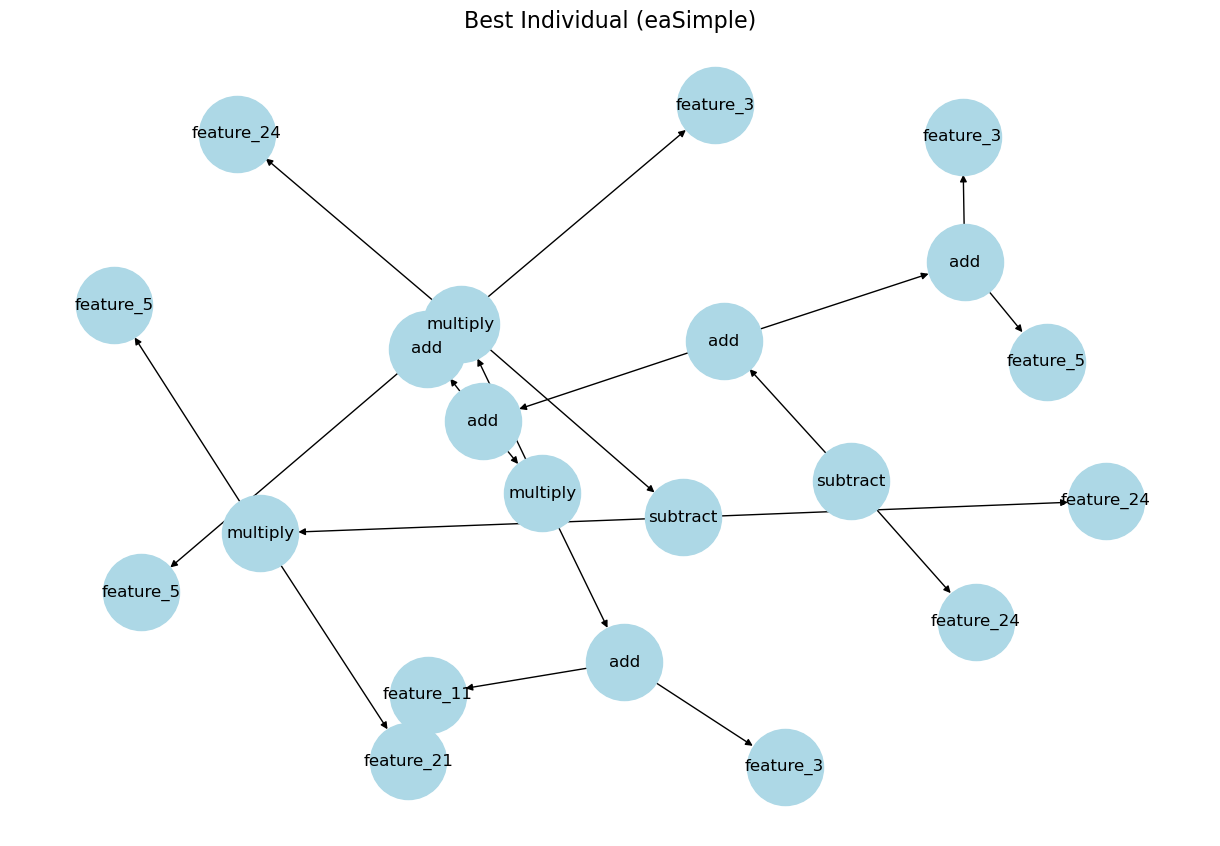

Visualizing eaMuPlusLambda's Best Individual:


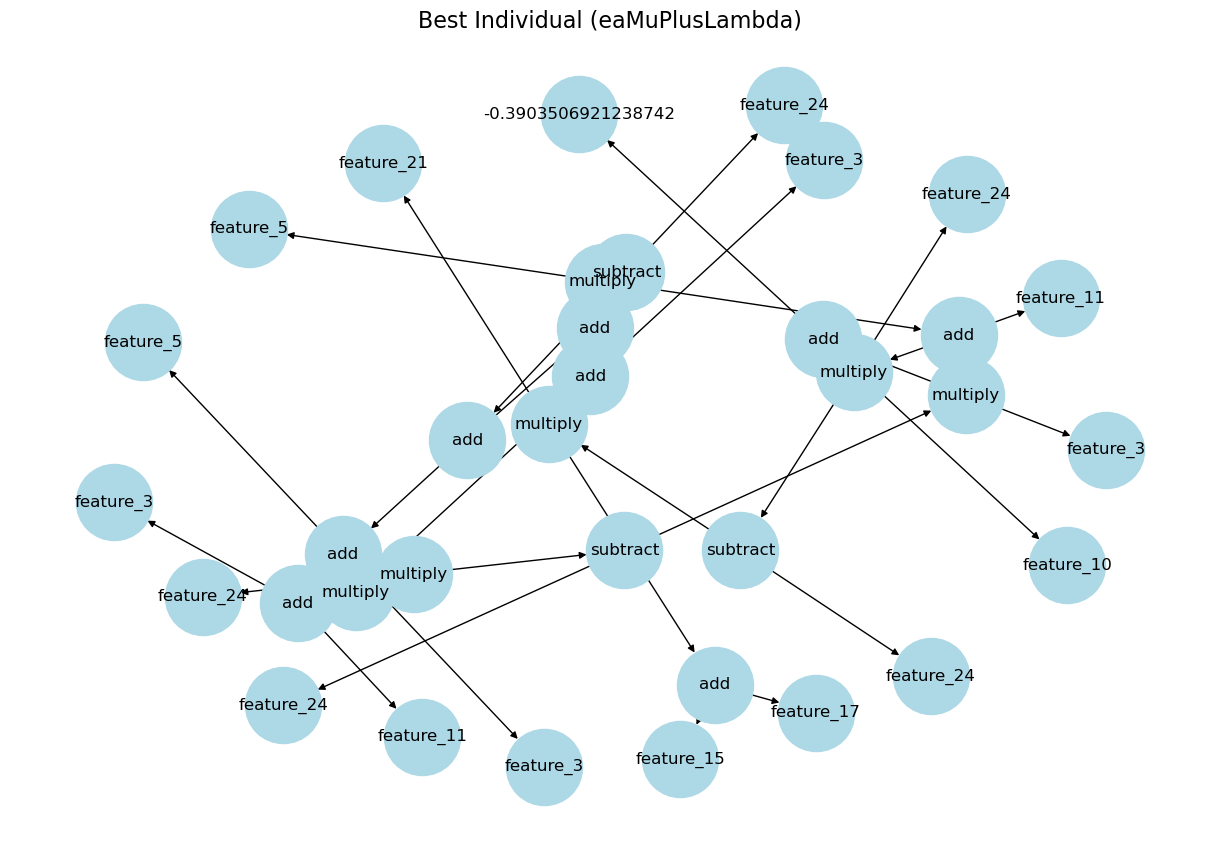

In [26]:
# Visualize eaSimple's best individual
print("Visualizing eaSimple's Best Individual:")
plot_tree(best_individual, title="Best Individual (eaSimple)")

# Visualize eaMuPlusLambda's best individual
print("Visualizing eaMuPlusLambda's Best Individual:")
plot_tree(best_individual2, title="Best Individual (eaMuPlusLambda)")

In [27]:
# Compare the accuracy and training/prediction times
print("\nComparison of Models:")
print(f"eaSimple - Accuracy: {report_eas['accuracy']:.4f}, Training Time: {report_eas['training_time']:.4f}s, Test Time: {report_eas['test_time']:.4f}s")
print(f"eaMuPlusLambda - Accuracy: {report_eam['accuracy']:.4f}, Training Time: {report_eam['training_time']:.4f}s, Test Time: {report_eam['test_time']:.4f}s")


Comparison of Models:
eaSimple - Accuracy: 0.6996, Training Time: 1153.2243s, Test Time: 1.4838s
eaMuPlusLambda - Accuracy: 0.7036, Training Time: 2435.5869s, Test Time: 2.2358s


eaMuPlusLambda is the best choice if we prioritize accuracy and better handling of the minority class, as it achieves higher overall performance metrics. However, if speed during training and testing is more critical and a slight drop in performance is acceptable, eaSimple is more efficient.

### 4. Performance Metrics

KeyError: 'accuracy'